In [119]:
import pandas as pd
import numpy as np
import seaborn as sns


In [120]:
# Create the data
data= pd.DataFrame({'age': [20,22,24,26,28,30,32,70]})

In [121]:
data.head()

,age
0,20
1,22
2,24
3,26
4,28


In [122]:
# Calculate the mean and standard deviation
mean= np.mean(data['age'])
std= np.std(data['age'])

In [123]:
# Calculate the z-score or z-score remove the outliers
data['Z-Score']= (data['age'] - mean/ std)
data

,age,Z-Score
0,20,17.903491
1,22,19.903491
2,24,21.903491
3,26,23.903491
4,28,25.903491
5,30,27.903491
6,32,29.903491
7,70,67.903491


In [124]:
# Identify outliers using a standard threshold (e.g., |Z-Score| > 2)
outliers = data[np.abs(data['Z-Score']) > 67]
print(f'Outliers based on Z-score (threshold > 2):\n{outliers}')

Outliers based on Z-score (threshold > 2):
   age    Z-Score
7   70  67.903491


In [125]:
# Remove outliers
data_clean = data[np.abs(data['Z-Score']) <= 2]  # Keep data within 2 standard deviations

print(f'Data without outliers:\n{data_clean}')

Data without outliers:
Empty DataFrame
Columns: [age, Z-Score]
Index: []


In [126]:
import numpy as np
from scipy import stats

#sample data
data= [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.1]

# Calculate the Z-Score for each data point
z_scores= np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold= 2.5
outliers= np.where(z_scores > threshold)[0] #is threshold ki base py outliers ko remove kr sakhty hai

# print the data
print('Data', data)
print('Indicates of Outliers:', outliers)
print('Outliers:', [data[i] for i in outliers])

# Remove outliers
data= [data[i] for i in range(len(data)) if i not in outliers]
print('--------------------------------')
print('Data without outliers:', data)

Data [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.1]
Indicates of Outliers: [9]
Outliers: [110.1]
--------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


In [130]:
from sklearn.cluster import KMeans

# Sample data
data= [[2,2],[3,3],[4,4],[5,5],[32,32],[34,34],[36,36]]

# Create a K-means model with two clusters (normal and outliers)
kmeans= KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# Predict cluster labels
labels= kmeans.predict(data)

# Identify outliers based on cluster labels
outliers= [data[i] for i, label in enumerate(labels) if label ==1]

# print data
print('Data without outliers:', data)
print('Outliers:', outliers)

# Remove outliers:
data= [data[i] for i, label in enumerate(labels) if label == 0]
print("Data without outliers:", data)



Data without outliers: [[2, 2], [3, 3], [4, 4], [5, 5], [32, 32], [34, 34], [36, 36]]
Outliers: [[32, 32], [34, 34], [36, 36]]
Data without outliers: [[2, 2], [3, 3], [4, 4], [5, 5]]


In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [85]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [86]:
len(df)

891

In [87]:
round(df.isnull().sum()/len(df)*100).sort_values(ascending=False)


deck           77.0
age            20.0
pclass          0.0
sex             0.0
sibsp           0.0
parch           0.0
survived        0.0
fare            0.0
embarked        0.0
who             0.0
class           0.0
adult_male      0.0
embark_town     0.0
alive           0.0
alone           0.0
dtype: float64

In [88]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

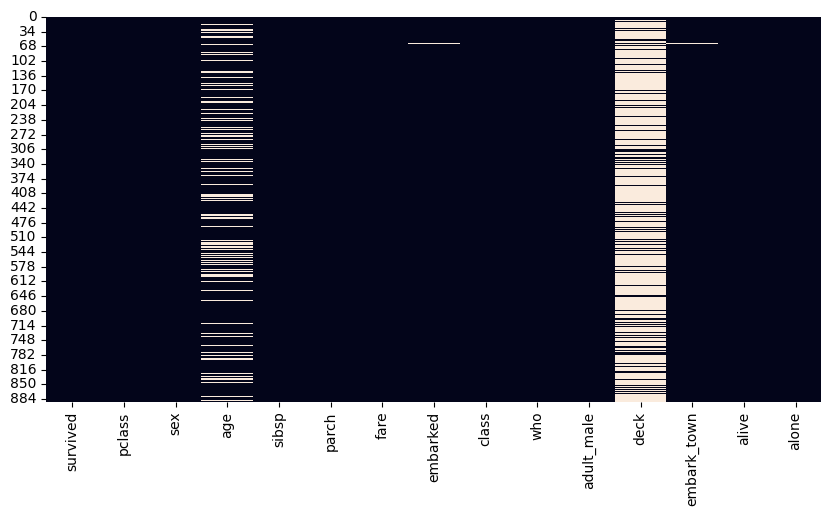

In [89]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [90]:
df['deck']=df['deck'].fillna(df['deck'].mode()[0])

In [92]:
df.isnull().sum().sort_values(ascending=False)

age            177
embarked         2
pclass           0
sex              0
sibsp            0
parch            0
survived         0
fare             0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
dtype: int64

In [95]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [94]:
df.drop('deck', axis=1, inplace=True)

In [91]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [47]:
impute= SimpleImputer(strategy='median')
df['age']= impute.fit_transform(df[['age']])

In [48]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [57]:
df['embark_town'].value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [49]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns

In [97]:
data= {
    'date': ['2021-2-1','2021/3/2','2021/5/3','2021-6-6'],
    'country': ['USA', 'U.S.A', 'America', 'United State Of America'],
    'name': ['Amal', 'Asfand', 'Amal', 'Asfand'],
    'sale_2024': [100, 200, None,333],
    'sale_2025': [None, 150, 300, 200]
}

In [98]:
#make pandas dataframe:
df=pd.DataFrame(data)
df.head()

,date,country,name,sale_2024,sale_2025
0,2021-2-1,USA,Amal,100.0,NaN
1,2021/3/2,U.S.A,Asfand,200.0,150.0
2,2021/5/3,America,Amal,NaN,300.0
3,2021-6-6,United State Of America,Asfand,333.0,200.0


In [99]:
#standardize the data format
df['date']=pd.to_datetime(df['date'], errors='coerce')

In [100]:
df.head()

,date,country,name,sale_2024,sale_2025
0,2021-02-01,USA,Amal,100.0,NaN
1,NaT,U.S.A,Asfand,200.0,150.0
2,NaT,America,Amal,NaN,300.0
3,2021-06-06,United State Of America,Asfand,333.0,200.0


In [101]:
df['date']=df['date'].dt.strftime('%Y-%m-%d')
df.head()

,date,country,name,sale_2024,sale_2025
0,2021-02-01,USA,Amal,100.0,NaN
1,NaN,U.S.A,Asfand,200.0,150.0
2,NaN,America,Amal,NaN,300.0
3,2021-06-06,United State Of America,Asfand,333.0,200.0


In [102]:
# Harmonize the name of the country
country_mapping= {'USA':'America', 'U.S.A':'America', 'United State Of America': 'America'}
df['country']= df['country'].replace(country_mapping)

In [104]:
df.head()

,date,country,name,sale_2024,sale_2025
0,2021-02-01,America,Amal,100.0,NaN
1,NaN,America,Asfand,200.0,150.0
2,NaN,America,Amal,NaN,300.0
3,2021-06-06,America,Asfand,333.0,200.0


In [105]:
df.drop_duplicates(subset='name')

,date,country,name,sale_2024,sale_2025
0,2021-02-01,America,Amal,100.0,NaN
1,NaN,America,Asfand,200.0,150.0


In [106]:
df.head()

,date,country,name,sale_2024,sale_2025
0,2021-02-01,America,Amal,100.0,NaN
1,NaN,America,Asfand,200.0,150.0
2,NaN,America,Amal,NaN,300.0
3,2021-06-06,America,Asfand,333.0,200.0


In [107]:
df= df.drop(df[df['sale_2025'] <= df['sale_2024']].index) 
df.head()

,date,country,name,sale_2024,sale_2025
0,2021-02-01,America,Amal,100.0,NaN
2,NaN,America,Amal,NaN,300.0


# ```Data Merging```: using pandas 

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns


In [156]:
data1= {'id': [1,2,3],
        'name':['Ahmed', 'Ali','Hasan'],
       'age':[28, 31,29]}
data2= {'id': [1,2,3],
        'city': ['Karachi', 'Lahore', 'Islamabad'],
        'occupation': ['Engineer', 'Doctor', 'Lowyer']}


In [157]:
df=pd.DataFrame(data1)
df

,id,name,age
0,1,Ahmed,28
1,2,Ali,31
2,3,Hasan,29


In [158]:
df2=pd.DataFrame(data2)
df2

,id,city,occupation
0,1,Karachi,Engineer
1,2,Lahore,Doctor
2,3,Islamabad,Lowyer


In [159]:
merge_df=pd.merge(df, df2, on='id', how='inner')
merge_df

,id,name,age,city,occupation
0,1,Ahmed,28,Karachi,Engineer
1,2,Ali,31,Lahore,Doctor
2,3,Hasan,29,Islamabad,Lowyer


# Data Concatnation:

In [204]:
import pandas as pd
data1= {'Name': ['Ali', 'Ahmad', 'Salman'], 'Age': [28,32, 24]}
data2= {'Name':['Zunaira', 'Irha', 'Ishbal'], 'Age': [29, 35, 27]}
data3= {'City':['Islamabad', 'Karachi', 'Lahore'], 'province': ['Punjab', 'KPK', 'Sindh']}
df1= pd.DataFrame(data1)
df2= pd.DataFrame(data2)
df3= pd.DataFrame(data3)

concatnation_rows= pd.concat([df1, df2])
print(concatnation_rows)
print('----------------')

concatnate_columns= pd.concat([df1, df3], axis=1)
print(concatnate_columns)
print('----------------')


concatnation_rows, concatnate_columns



      Name  Age
0      Ali   28
1    Ahmad   32
2   Salman   24
0  Zunaira   29
1     Irha   35
2   Ishbal   27
----------------
     Name  Age       City province
0     Ali   28  Islamabad   Punjab
1   Ahmad   32    Karachi      KPK
2  Salman   24     Lahore    Sindh
----------------


(      Name  Age
 0      Ali   28
 1    Ahmad   32
 2   Salman   24
 0  Zunaira   29
 1     Irha   35
 2   Ishbal   27,
      Name  Age       City province
 0     Ali   28  Islamabad   Punjab
 1   Ahmad   32    Karachi      KPK
 2  Salman   24     Lahore    Sindh)

# `Standard Scaling:`
Standard scaling is a method of scaling the data such that the dirtribution of the data is centered around 0, with a standard deviation of 1.This is done by subtracting the mean oofo the data from each data point and then dividing by the standard deviation of the data. This is a very common method of scaling data, and its used in many ml algorithms.

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [12]:
data={'Age': [20, 30, 40, 50, 60, 70],
    'Height': [170, 180, 100, 120, 177, 169],
    'Weight': [40, 45, 50, 55, 60, 65]}

In [13]:
df= pd.DataFrame(data)
df.head()

,Age,Height,Weight
0,20,170,40
1,30,180,45
2,40,100,50
3,50,120,55
4,60,177,60


In [16]:
# import the scalar:
scalar= StandardScaler()

# fit the scalar on data
scalar_df= scalar.fit_transform(df)
scalar_df

# Convert the data into a pandas dataframe
scalar_df= pd.DataFrame(scalar_df,  columns=df.columns)
scalar_df

,Age,Height,Weight
0,-1.46385,0.560047,-1.46385
1,-0.87831,0.883151,-0.87831
2,-0.29277,-1.701681,-0.29277
3,0.29277,-1.055473,0.29277
4,0.87831,0.786220,0.87831
5,1.46385,0.527737,1.46385


# `Min-Max Scalar or Robust Scalars` in Python:

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [19]:
# import the scalar:
scalar= MinMaxScaler()

# fit the scalar on data
scalar_df= scalar.fit_transform(df)
scalar_df

# Convert the data into a pandas dataframe
scalar_df= pd.DataFrame(scalar_df,  columns=df.columns)
scalar_df

,Age,Height,Weight
0,0.0,0.8750,0.0
1,0.2,1.0000,0.2
2,0.4,0.0000,0.4
3,0.6,0.2500,0.6
4,0.8,0.9625,0.8
5,1.0,0.8625,1.0


In [23]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

In [24]:
# import the scalar:
scalar= RobustScaler()

# fit the scalar on data
scalar_df= scalar.fit_transform(df)
scalar_df

# Convert the data into a pandas dataframe
scalar_df= pd.DataFrame(scalar_df,  columns=df.columns)
scalar_df

,Age,Height,Weight
0,-1.0,0.011628,-1.0
1,-0.6,0.244186,-0.6
2,-0.2,-1.616279,-0.2
3,0.2,-1.151163,0.2
4,0.6,0.174419,0.6
5,1.0,-0.011628,1.0


# `Max Absolute scalar` in python:

In [21]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler

In [22]:
# import the scalar:
scalar= MaxAbsScaler()

# fit the scalar on data
scalar_df= scalar.fit_transform(df)
scalar_df

# Convert the data into a pandas dataframe
scalar_df= pd.DataFrame(scalar_df,  columns=df.columns)
scalar_df

,Age,Height,Weight
0,0.285714,0.944444,0.615385
1,0.428571,1.000000,0.692308
2,0.571429,0.555556,0.769231
3,0.714286,0.666667,0.846154
4,0.857143,0.983333,0.923077
5,1.000000,0.938889,1.000000


# Transformation:

In [26]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# general non-normal data (exponential distribution) 
np.random.seed(0)
df= np.random.exponential(size=100, scale=3)
df= pd.DataFrame(df, columns=['values'])
print(df.head())
df.shape

     values
0  2.387624
1  3.767792
2  2.769669
3  2.361603
4  1.653145


(100, 1)

<Axes: xlabel='values', ylabel='Count'>

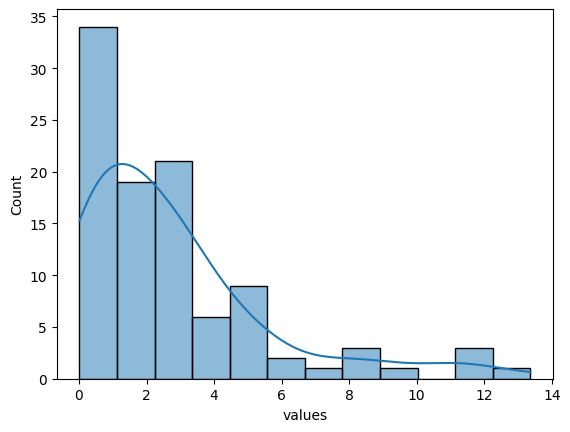

In [31]:
sns.histplot(df['values'], kde=True)

In [43]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox= PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson= PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal= QuantileTransformer(output_distribution='normal')

# data always positive in boxocox:
df['Box_cox']= pt_boxcox.fit_transform(df[['values']]+ 1)
df['yeo_johnson']= pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile']= qt_normal.fit_transform(df[['values']])



c:\Users\Summaiya\.conda\envs\ydata_profiling\Lib\site-packages\sklearn\preprocessing\_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


In [44]:
df.head()

,values,Box_cox,yeo_johnson,Quantile
0,2.387624,1.057064,1.057064,0.139710
1,3.767792,1.301526,1.301526,0.764710
2,2.769669,1.135676,1.135676,0.321971
3,2.361603,1.051313,1.051313,0.114185
4,1.653145,0.869483,0.869483,-0.165327


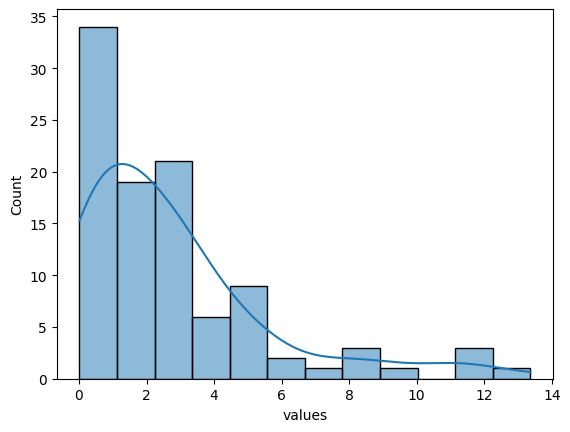

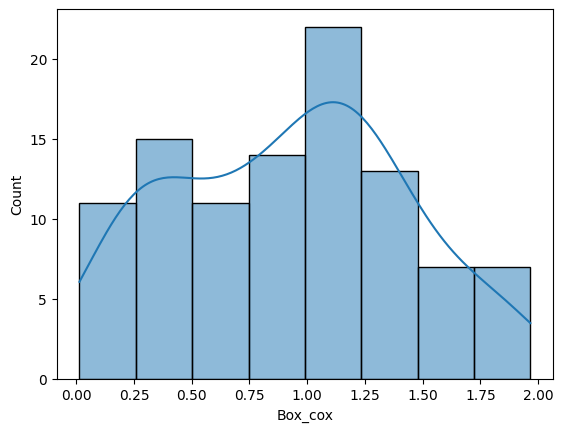

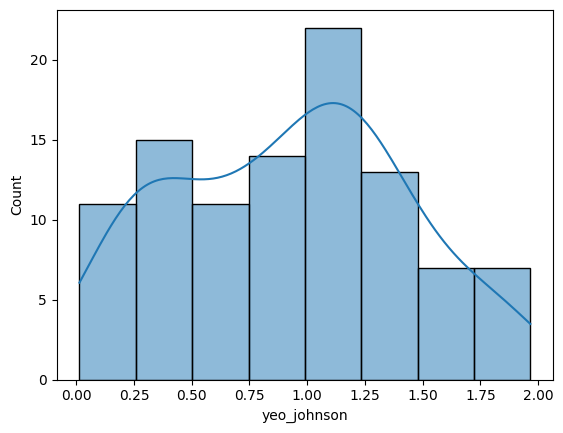

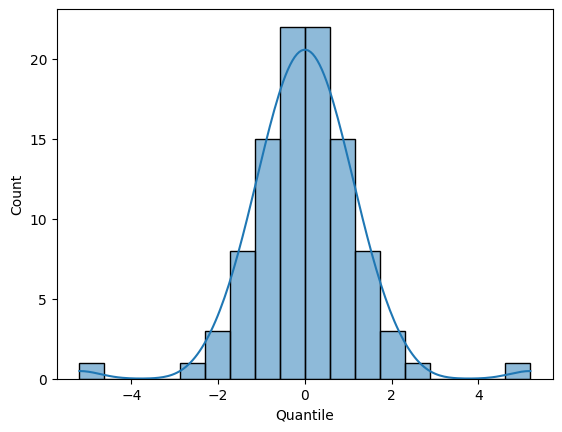

In [45]:
# create a hsitogram for all columns using sns.hist and kde=true use a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()